# Fake or Real News - NLP with Phyton

**Import libraries**

In [1]:
#Exploratory Data Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

#ML libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#Evaluation Libraries
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

#NLTK
import nltk
#nltk.download_shell()
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

**Import Datasets**

In [2]:
fake=pd.read_csv('fake.csv')

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [5]:
true=pd.read_csv('True.csv')

In [6]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
#Add new label column for each df
fake['label']='Fake'
true['label']='True'

In [8]:
#Combine the 2 datasets
df=pd.concat([true,fake],ignore_index=True)


In [9]:
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [11]:
df.describe()

,title,text,subject,date,label
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",Fake
freq,14,627,11272,182,23481


# EDA

In [12]:
#Include a column with the length of the text
df['text length']=df['text'].apply(len)

In [13]:
df.head()

,title,text,subject,date,label,text length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True,4659
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True,4077
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True,2789
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True,2461
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True,5204


In [14]:
#Include a column with the length of the title
df['title length']=df['title'].apply(len)
df.head()

,title,text,subject,date,label,text length,title length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True,4659,64
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True,4077,64
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True,2789,60
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True,2461,59
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True,5204,69


In [15]:
#Group the data based on label and subject
df.groupby(['label','subject']).count()

title   text   date  text length  title length
label subject                                                        
Fake  Government News   1570   1570   1570         1570          1570
      Middle-east        778    778    778          778           778
      News              9050   9050   9050         9050          9050
      US_News            783    783    783          783           783
      left-news         4459   4459   4459         4459          4459
      politics          6841   6841   6841         6841          6841
True  politicsNews     11272  11272  11272        11272         11272
      worldnews        10145  10145  10145        10145         10145

<AxesSubplot:xlabel='subject', ylabel='count'>

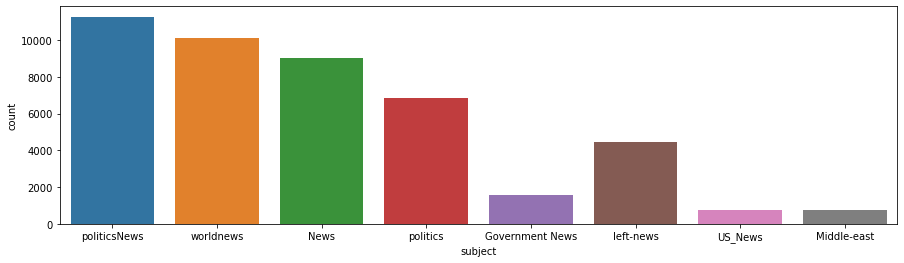

In [16]:
#Create a visual representation of the group by above
plt.figure(figsize=(15,4))
sns.countplot(data=df,x='subject')

In [17]:
#Group the data based on label
df.groupby('label').describe()

text length                                                         \
            count         mean          std  min     25%     50%     75%   
label                                                                      
Fake      23481.0  2547.396235  2532.884399  1.0  1433.0  2166.0  3032.0   
True      21417.0  2383.278517  1684.835730  1.0   914.0  2222.0  3237.0   

               title length                                                 \
           max        count       mean        std   min   25%   50%    75%   
label                                                                        
Fake   51794.0      23481.0  94.198032  27.184433   8.0  77.0  90.0  105.0   
True   29781.0      21417.0  64.667881   9.168999  26.0  59.0  64.0   70.0   

              
         max  
label         
Fake   286.0  
True   133.0

The dataset seems to have similar number of fake and true articles

array([<AxesSubplot:title={'center':'Fake'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

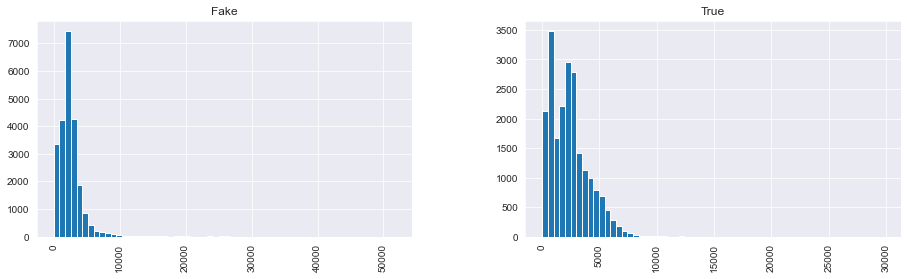

In [18]:
#2 histograms of text length based of the label True or Fake
sns.set_style("darkgrid")
df.hist(column='text length',by='label',bins=60,figsize=(15,4))

<Figure size 1080x288 with 0 Axes>

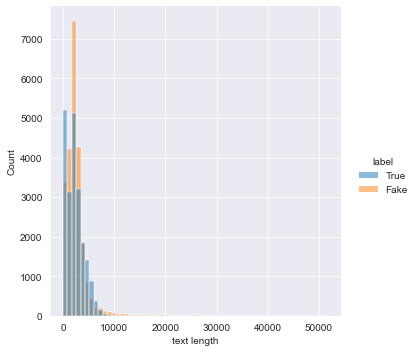

In [19]:
#Plot the 2 histograms on the same plot to compare them
plt.figure(figsize=(15,4))
sns.displot(data=df,x='text length',bins=60,hue='label')

The distribution of text lentgh between fake and true articles in pretty similar.

array([<AxesSubplot:title={'center':'Fake'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

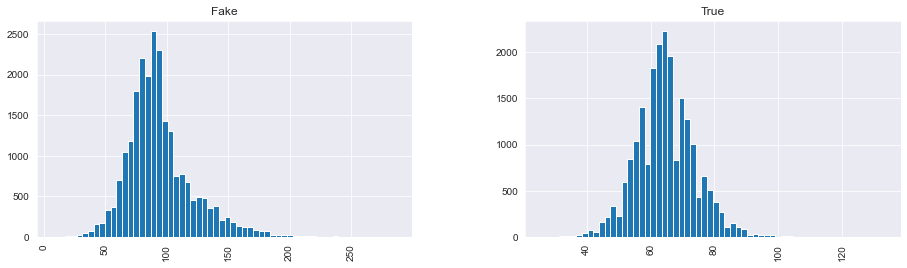

In [20]:
#2 histograms of title length based of the label True or Fake
sns.set_style("darkgrid")
df.hist(column='title length',by='label',bins=60,figsize=(15,4))

<Figure size 1080x288 with 0 Axes>

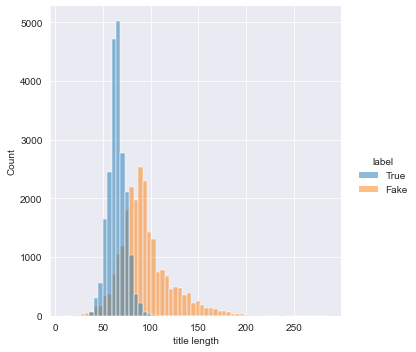

In [21]:
#Plot the 2 histograms on the same plot to compare them
plt.figure(figsize=(15,4))
sns.displot(data=df,x='title length',bins=60,hue='label')

Fake news articles tend to have longer titles,most of them varying between 70-130 characters, while real news have a title length close to 50-70 characters.

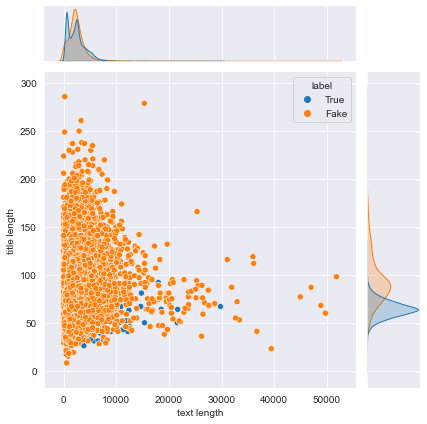

In [22]:
#Joint plot between text length and title length
sns.jointplot(data=df,x='text length',y='title length',hue='label')

**Analyze the articles based on the date they were published**

In [23]:
#Check how the date format by printing the first 10 dates in the df
df['date'][0:10]

0    December 31, 2017 
1    December 29, 2017 
2    December 31, 2017 
3    December 30, 2017 
4    December 29, 2017 
5    December 29, 2017 
6    December 29, 2017 
7    December 29, 2017 
8    December 29, 2017 
9    December 28, 2017 
Name: date, dtype: object

In [24]:
#Converting object type to datetime
#df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
#Seems there are some problems with the format of some of the date text. Search the df for the rows that don't mach the date format


In [25]:
df['real date']=df['date'].apply(len)

In [26]:
df[df['real date']>20]

,title,text,subject,date,label,text length,title length,real date
30775,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,Fake,145,145,145
36924,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,Fake,88,88,88
36925,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,Fake,149,149,149
37256,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,Fake,74,74,74
37257,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,Fake,66,66,66
38849,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,Fake,74,74,74
38850,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,Fake,66,66,66
40350,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,Fake,578,8,120
43286,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,Fake,74,74,74
43287,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,Fake,66,66,66


In [27]:
#Since this is a small fraction of the dateset I will drop the rows
df.drop(df[df['real date'] >20].index, inplace=True)

In [28]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44888 entries, 0 to 44897
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         44888 non-null  object        
 1   text          44888 non-null  object        
 2   subject       44888 non-null  object        
 3   date          44888 non-null  datetime64[ns]
 4   label         44888 non-null  object        
 5   text length   44888 non-null  int64         
 6   title length  44888 non-null  int64         
 7   real date     44888 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 3.1+ MB


In [30]:
df['year-month'] = pd.to_datetime(df['date']).dt.to_period('M')

In [31]:
df.head(3)

,title,text,subject,date,label,text length,title length,real date,year-month
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,True,4659,64,18,2017-12
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,True,4077,64,18,2017-12
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,True,2789,60,18,2017-12


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44888 entries, 0 to 44897
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         44888 non-null  object        
 1   text          44888 non-null  object        
 2   subject       44888 non-null  object        
 3   date          44888 non-null  datetime64[ns]
 4   label         44888 non-null  object        
 5   text length   44888 non-null  int64         
 6   title length  44888 non-null  int64         
 7   real date     44888 non-null  int64         
 8   year-month    44888 non-null  period[M]     
dtypes: datetime64[ns](1), int64(3), object(4), period[M](1)
memory usage: 3.4+ MB


<AxesSubplot:xlabel='year-month', ylabel='count'>

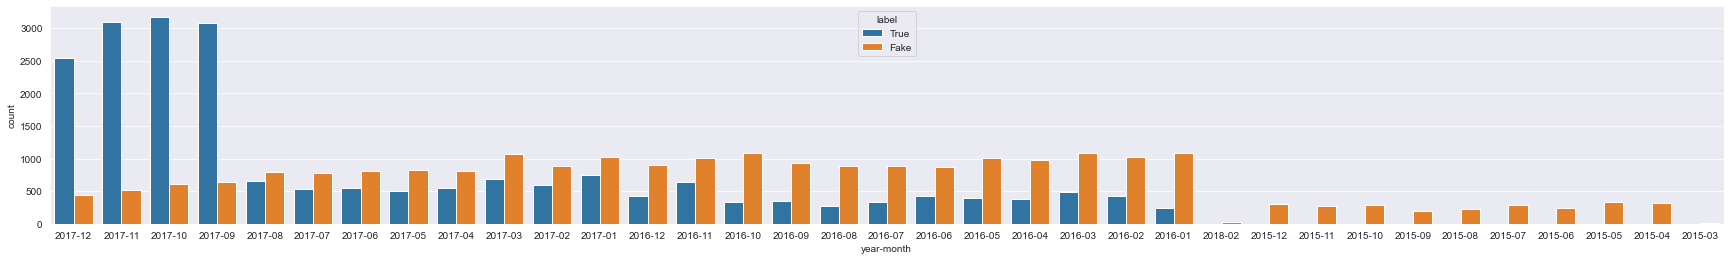

In [33]:
plt.figure(figsize=(30,4))
sns.countplot(data=df,x='year-month',hue='label')

In [34]:
#Drop column real date - is not needed anymore
df.drop(['real date'], axis=1, inplace=True)

## NLP Classification Task

In [35]:
df.head(3)

,title,text,subject,date,label,text length,title length,year-month
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,True,4659,64,2017-12
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,True,4077,64,2017-12
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,True,2789,60,2017-12


**Clasify the news in fake or real, dataset based on the text corpus**

In [36]:
#Create 2 objects X and y - the feature and the target
X=df['text']
y=df['label']

In [37]:
print(X)

0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3        WASHINGTON (Reuters) - Trump campaign adviser ...
4        SEATTLE/WASHINGTON (Reuters) - President Donal...
                               ...                        
44893    21st Century Wire says As 21WIRE reported earl...
44894    21st Century Wire says It s a familiar theme. ...
44895    Patrick Henningsen  21st Century WireRemember ...
44896    21st Century Wire says Al Jazeera America will...
44897    21st Century Wire says As 21WIRE predicted in ...
Name: text, Length: 44888, dtype: object


In [38]:
#Create a CountVectorizer object

cv = CountVectorizer()

In [39]:
X = cv.fit_transform(X)

In [40]:
print(X)

  (0, 116825)	2
  (0, 92493)	1
  (0, 107786)	44
  (0, 50409)	1
  (0, 79125)	13
  (0, 28116)	3
  (0, 91933)	6
  (0, 40795)	1
  (0, 54627)	19
  (0, 27977)	2
  (0, 117973)	4
  (0, 116014)	3
  (0, 108260)	3
  (0, 73136)	1
  (0, 43355)	15
  (0, 52935)	1
  (0, 40242)	1
  (0, 75375)	2
  (0, 31752)	3
  (0, 109155)	30
  (0, 82539)	3
  (0, 106785)	8
  (0, 30477)	3
  (0, 22358)	1
  (0, 51604)	1
  :	:
  (44887, 39942)	1
  (44887, 18832)	2
  (44887, 75028)	1
  (44887, 5767)	1
  (44887, 83361)	4
  (44887, 63500)	1
  (44887, 55492)	1
  (44887, 35987)	1
  (44887, 71843)	1
  (44887, 35983)	1
  (44887, 26828)	1
  (44887, 104029)	1
  (44887, 54183)	1
  (44887, 39871)	1
  (44887, 18808)	1
  (44887, 41260)	2
  (44887, 49591)	1
  (44887, 93283)	1
  (44887, 75973)	3
  (44887, 114150)	2
  (44887, 41638)	1
  (44887, 4307)	1
  (44887, 21707)	1
  (44887, 104307)	1
  (44887, 86033)	1


In [41]:
#Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
#Create an instance of the estimator and fit it to the dateset
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [43]:
#Predictions and evaluations

predictions = nb.predict(X_test)

In [44]:
print('Confusion Matrix')
print(confusion_matrix(y_test,predictions))
print('\n')
print('classification Report')
print(classification_report(y_test,predictions))
print('\n')
print('Accuracy Score')
print('accuracy %s' % accuracy_score(predictions, y_test))

Confusion Matrix
[[6665  325]
 [ 299 6178]]


classification Report
              precision    recall  f1-score   support

        Fake       0.96      0.95      0.96      6990
        True       0.95      0.95      0.95      6477

    accuracy                           0.95     13467
   macro avg       0.95      0.95      0.95     13467
weighted avg       0.95      0.95      0.95     13467



Accuracy Score
accuracy 0.9536645132546224


**Clasify the news in fake in real, dataset based on the title corpus**

In [45]:
#Create 2 objects X and y - the feature and the target
X=df['title']
y=df['label']

In [46]:
print(X)

0        As U.S. budget fight looms, Republicans flip t...
1        U.S. military to accept transgender recruits o...
2        Senior U.S. Republican senator: 'Let Mr. Muell...
3        FBI Russia probe helped by Australian diplomat...
4        Trump wants Postal Service to charge 'much mor...
                               ...                        
44893    McPain: John McCain Furious That Iran Treated ...
44894    JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
44895    Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
44896    How to Blow $700 Million: Al Jazeera America F...
44897    10 U.S. Navy Sailors Held by Iranian Military ...
Name: title, Length: 44888, dtype: object


In [47]:
#Create a CountVectorizer object

cv = CountVectorizer()
X = cv.fit_transform(X)

In [48]:
#Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
#Create an instance of the estimator and fit it to the dateset
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [50]:
#Predictions and evaluations

predictions = nb.predict(X_test)

In [51]:
print('Confusion Matrix')
print(confusion_matrix(y_test,predictions))
print('\n')
print('classification Report')
print(classification_report(y_test,predictions))
print('\n')
print('Accuracy Score')
print('accuracy %s' % accuracy_score(predictions, y_test))

Confusion Matrix
[[6731  259]
 [ 430 6047]]


classification Report
              precision    recall  f1-score   support

        Fake       0.94      0.96      0.95      6990
        True       0.96      0.93      0.95      6477

    accuracy                           0.95     13467
   macro avg       0.95      0.95      0.95     13467
weighted avg       0.95      0.95      0.95     13467



Accuracy Score
accuracy 0.9488379000519789


Seems that using the text column offers a better accuracy then ussing the title column with this method of classification

**NLP Using Text Processing - Using Linear Support Vector Machine on title column**

In [52]:
#Create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),SGDClassifier()**

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SGDClassifier()),  # train on TF-IDF vectors w/ Support Vector Machine classifier
])

In [53]:
#Create 2 objects X and y - the feature and the target - with title
X=df['title']
y=df['label']

In [54]:
#Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SGDClassifier())])

In [56]:
#Predictions and evaluation

predictions = pipeline.predict(X_test)

In [58]:
print('Confusion Matrix')
print(confusion_matrix(y_test,predictions))
print('\n')
print('classification Report')
print(classification_report(y_test,predictions))
print('\n')
print('Accuracy Score')
print('accuracy %s' % accuracy_score(predictions, y_test))

Confusion Matrix
[[6625  365]
 [ 247 6230]]


classification Report
              precision    recall  f1-score   support

        Fake       0.96      0.95      0.96      6990
        True       0.94      0.96      0.95      6477

    accuracy                           0.95     13467
   macro avg       0.95      0.95      0.95     13467
weighted avg       0.95      0.95      0.95     13467



Accuracy Score
accuracy 0.9545555803074182


In [59]:
# Function for Cross validation
def model_ev(actual,predict):
    
    accu = accuracy_score(actual,predict)
    print(f'Accuracy score is {accu}')

# Checking Bias and variance
y_train_pred = pipeline.predict(X_train)
print(f'Training accuracy = ', end = ' ')
model_ev(y_train,y_train_pred)
y_test_pred = pipeline.predict(X_test)
print(f'Testing accuracy = ', end = ' ')
model_ev(y_test,y_test_pred)

Training accuracy =  Accuracy score is 0.9703383087743865
Testing accuracy =  Accuracy score is 0.9545555803074182


**Grid Search**

Tune parameters using GridSearchCV.

In [60]:
parameters_svm = {'bow__ngram_range': [(1, 1), (1, 2)],
                  'tfidf__use_idf': (True, False),
                  'classifier__max_iter': (5,50,100,500,1000), #maximum number of epochs
                  'classifier__alpha': (1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3) # learning rate
                }
gs_clf_svm = GridSearchCV(pipeline, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(X_train,y_train)
gs_clf_svm.best_score_
gs_clf_svm.best_params_

{'bow__ngram_range': (1, 2),
 'classifier__alpha': 0.0001,
 'classifier__max_iter': 100,
 'tfidf__use_idf': True}

In [62]:
gs_clf_svm.best_estimator_

Pipeline(steps=[('bow', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('classifier', SGDClassifier(max_iter=100))])

In [63]:
grid_predictions = gs_clf_svm.predict(X_test)

In [64]:
print('Confusion Matrix')
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print('classification Report')
print(classification_report(y_test,grid_predictions))
print('\n')
print('Accuracy Score')
print('accuracy %s' % accuracy_score(grid_predictions, y_test))

Confusion Matrix
[[6699  291]
 [ 308 6169]]


classification Report
              precision    recall  f1-score   support

        Fake       0.96      0.96      0.96      6990
        True       0.95      0.95      0.95      6477

    accuracy                           0.96     13467
   macro avg       0.96      0.96      0.96     13467
weighted avg       0.96      0.96      0.96     13467



Accuracy Score
accuracy 0.9555209029479468


In [65]:
# Checking Bias and variance
y_train_pred = gs_clf_svm.predict(X_train)
print(f'Training accuracy = ', end = ' ')
model_ev(y_train,y_train_pred)
y_test_pred = gs_clf_svm.predict(X_test)
print(f'Testing accuracy = ', end = ' ')
model_ev(y_test,y_test_pred)

Training accuracy =  Accuracy score is 0.9817001368511505
Testing accuracy =  Accuracy score is 0.9555209029479468


The accuracy of the model has improved a little, but nothing significant.

**NLTK**

Check if NLTK can improve the model, using the title column.

1. Removing stop words:

In [66]:
#Create a new pipeline with stop words 

stop_words_pipeline = Pipeline([
    ('bow', CountVectorizer(ngram_range=(1, 2),stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', SGDClassifier(max_iter=1000,alpha=0.0001)),
])

In [67]:
X=df['title']
y=df['label']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
stop_words_pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('classifier', SGDClassifier())])

In [70]:
stop_words_predictions = stop_words_pipeline.predict(X_test)

In [71]:
print('Confusion Matrix')
print(confusion_matrix(y_test,stop_words_predictions))
print('\n')
print('classification Report')
print(classification_report(y_test,stop_words_predictions))
print('\n')
print('Accuracy Score')
print('accuracy %s' % accuracy_score(stop_words_predictions, y_test))

Confusion Matrix
[[6583  407]
 [ 335 6142]]


classification Report
              precision    recall  f1-score   support

        Fake       0.95      0.94      0.95      6990
        True       0.94      0.95      0.94      6477

    accuracy                           0.94     13467
   macro avg       0.94      0.95      0.94     13467
weighted avg       0.94      0.94      0.94     13467



Accuracy Score
accuracy 0.9449023539021312


2. Stemming:

In [72]:
stemmer = SnowballStemmer("english", ignore_stopwords=True)

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
    
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

stemming_pipeline = Pipeline([('bow', stemmed_count_vect),
                             ('tfidf', TfidfTransformer()),
                             ('classifier', SGDClassifier(max_iter=1000,alpha=0.0001)),
                            
                            ])
stemming_pipeline = stemming_pipeline.fit(X_train,y_train)
stemming_predictions = stemming_pipeline.predict(X_test)



In [73]:
print('Confusion Matrix')
print(confusion_matrix(y_test,stemming_predictions))
print('\n')
print('classification Report')
print(classification_report(y_test,stemming_predictions))
print('\n')
print('Accuracy Score')
print('accuracy %s' % accuracy_score(stemming_predictions, y_test))

Confusion Matrix
[[6513  477]
 [ 345 6132]]


classification Report
              precision    recall  f1-score   support

        Fake       0.95      0.93      0.94      6990
        True       0.93      0.95      0.94      6477

    accuracy                           0.94     13467
   macro avg       0.94      0.94      0.94     13467
weighted avg       0.94      0.94      0.94     13467



Accuracy Score
accuracy 0.938961906883493


Stop words and stemming did not help rise the accuracy of the model. The best options for a model that uses the title column is SGDClassifier+GridSearchCV.

**NLP Using Text Processing - Using Linear Support Vector Machine on text column**

In [74]:
#Use the same pipeline as on title column

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SGDClassifier()),  # train on TF-IDF vectors w/ Support Vector Machine classifier
])

In [75]:
#Create 2 objects X and y - the feature and the target - with text column
X=df['text']
y=df['label']

In [76]:
#Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SGDClassifier())])

In [78]:
#Predictions and evaluation

predictions = pipeline.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test,predictions))
print('\n')
print('classification Report')
print(classification_report(y_test,predictions))
print('\n')
print('Accuracy Score')
print('accuracy %s' % accuracy_score(predictions, y_test))

Confusion Matrix
[[6933   57]
 [  40 6437]]


classification Report
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      6990
        True       0.99      0.99      0.99      6477

    accuracy                           0.99     13467
   macro avg       0.99      0.99      0.99     13467
weighted avg       0.99      0.99      0.99     13467



Accuracy Score
accuracy 0.9927972079899012


The model using Linear SVM on text column has an accuracy of 99.3%. Don't see how much it can be inproved.

In [79]:
# Checking Bias and variance
y_train_pred = pipeline.predict(X_train)
print(f'Training accuracy = ', end = ' ')
model_ev(y_train,y_train_pred)
y_test_pred = pipeline.predict(X_test)
print(f'Testing accuracy = ', end = ' ')
model_ev(y_test,y_test_pred)

Training accuracy =  Accuracy score is 0.9946532573756405
Testing accuracy =  Accuracy score is 0.9927972079899012
